# Data Preprocessing

## 1. Data Exploration:

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [3]:
# Get a summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Descriptive statistics
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

##  2. Data Cleaning:

In [5]:
#remove duplicates
df.drop_duplicates(inplace=True)

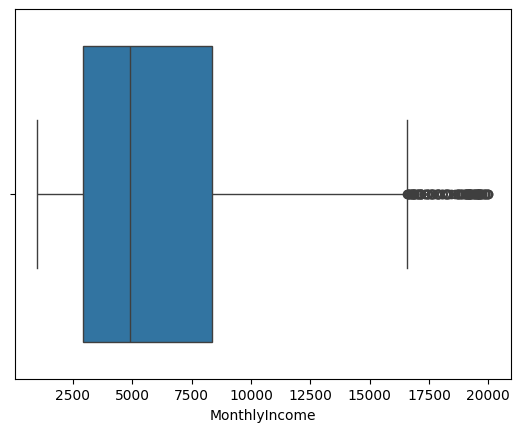

In [6]:
#Outlier detection and handling
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x='MonthlyIncome')
plt.show()


In [7]:
#Cap/Floor the Outliers
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap/floor the outliers
df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Show some stats after capping
print(df['MonthlyIncome'].describe())


count     1470.000000
mean      6361.891837
std       4353.345470
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      16581.000000
Name: MonthlyIncome, dtype: float64


## 3. Data Encoding:

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
#One-Hot Encoding for multi-class categorical features (e.g., Department, Job Role):
df = pd.get_dummies(df, columns=['Department', 'JobRole'])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['MonthlyIncome', 'YearsAtCompany']] = scaler.fit_transform(df[['MonthlyIncome', 'YearsAtCompany']])


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Updated list of categorical features (exclude already one-hot encoded columns)
categorical_features = ['BusinessTravel', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime']
# One-Hot Encoding for remaining categorical features
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')



In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE


# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Handle categorical data (if needed)
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance with SMOTE (Optional)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


c:\Users\salma\Documents\GitHub\Attrition-Forecast-Analysis-and-Predictions\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\salma\Documents\GitHub\Attrition-Forecast-Analysis-and-Predictions\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


# Performing Exploratory Data Analysis (EDA) 

## 1. Basic Information and Descriptive Statistics


In [20]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics of numerical features
print(df.describe())

# Information on dataset columns and missing values
print(df.info())


   Age Attrition     BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41       Yes      Travel_Rarely       1102                 1          2   
1   49        No  Travel_Frequently        279                 8          1   
2   37       Yes      Travel_Rarely       1373                 2          2   
3   33        No  Travel_Frequently       1392                 3          4   
4   27        No      Travel_Rarely        591                 2          1   

  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  ...  \
0  Life Sciences              1               1                        2  ...   
1  Life Sciences              1               2                        3  ...   
2          Other              1               4                        4  ...   
3  Life Sciences              1               5                        4  ...   
4        Medical              1               7                        1  ...   

   JobRole_Manufacturing Director  Job

## 2. Visualize Target Distribution (Attrition)


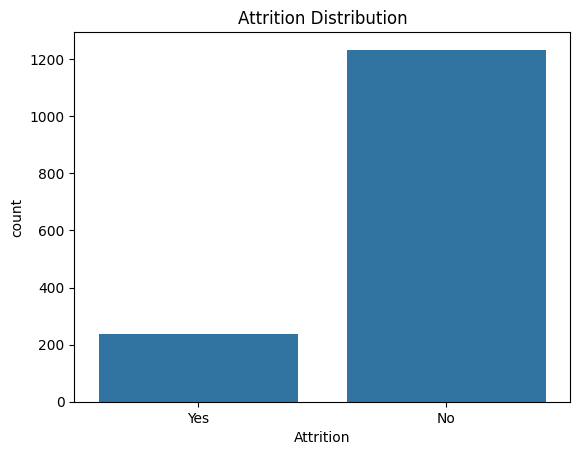

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Attrition
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()


## 3. Analyze Categorical Features


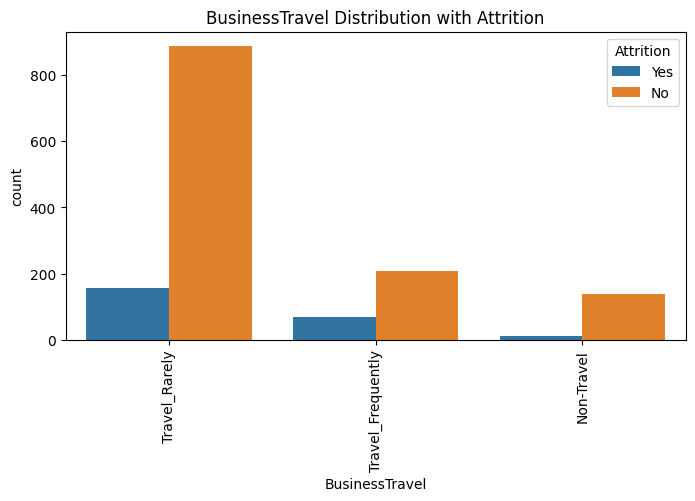

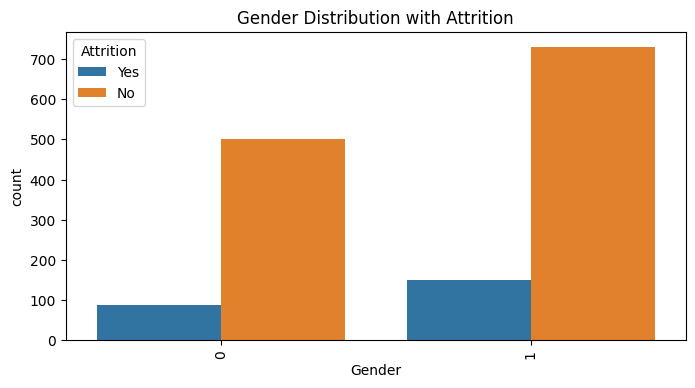

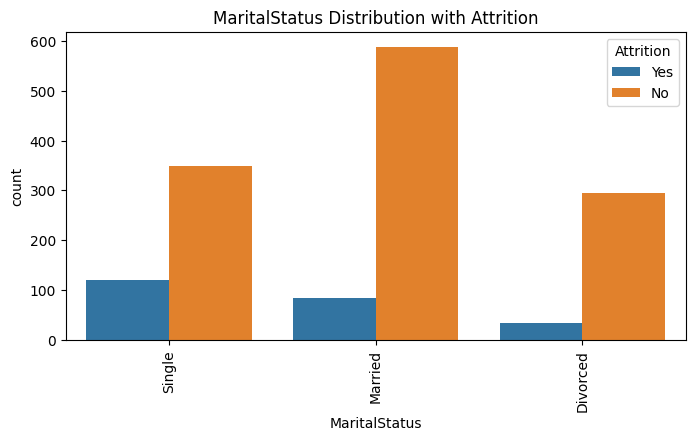

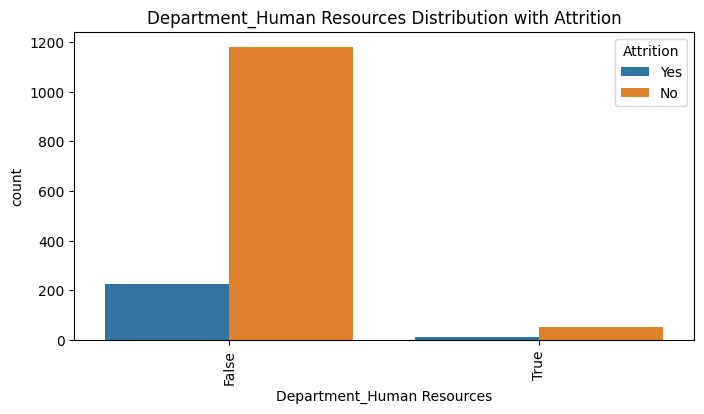

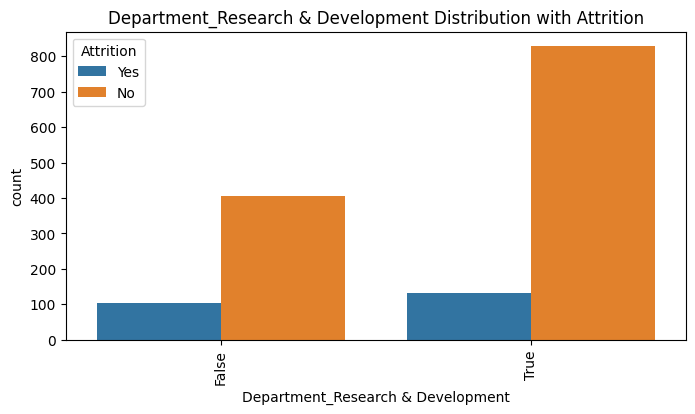

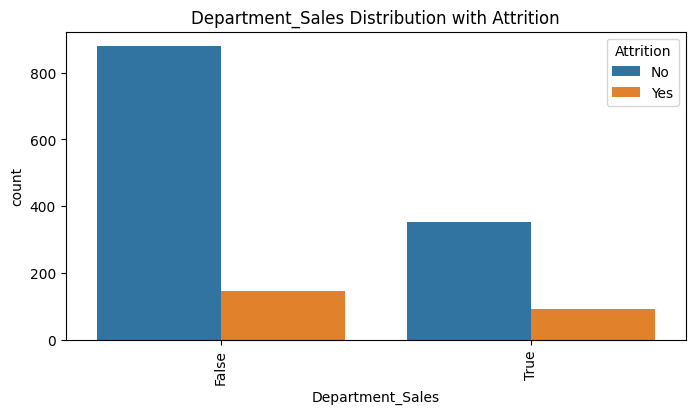

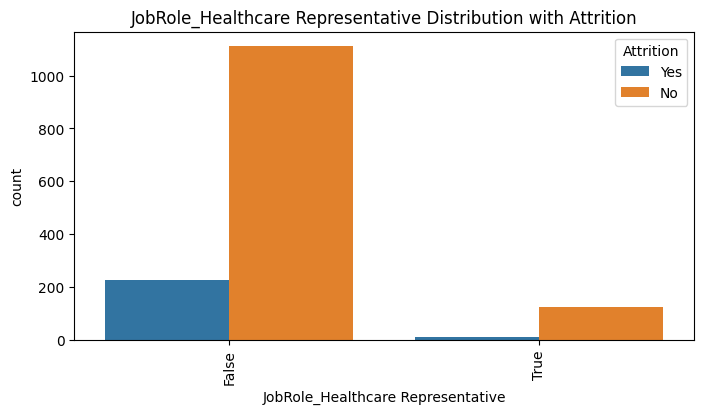

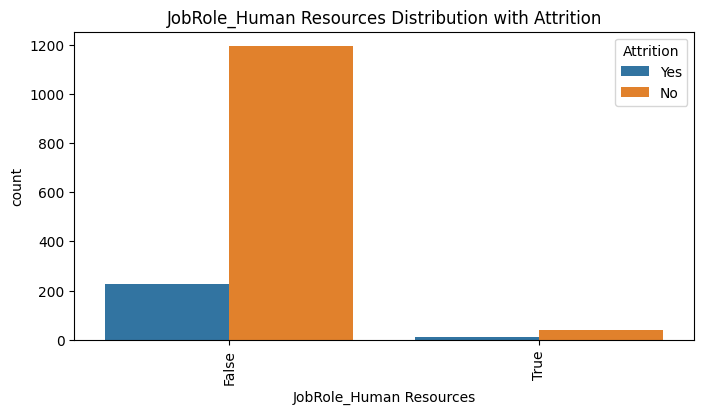

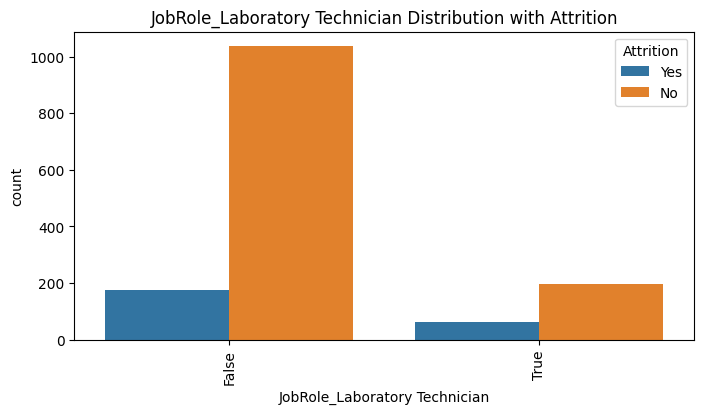

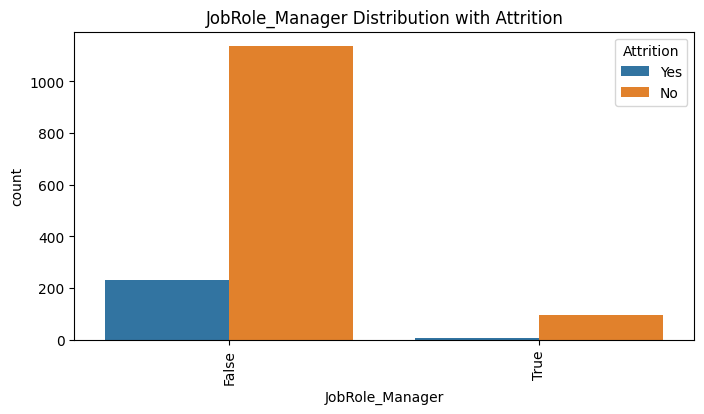

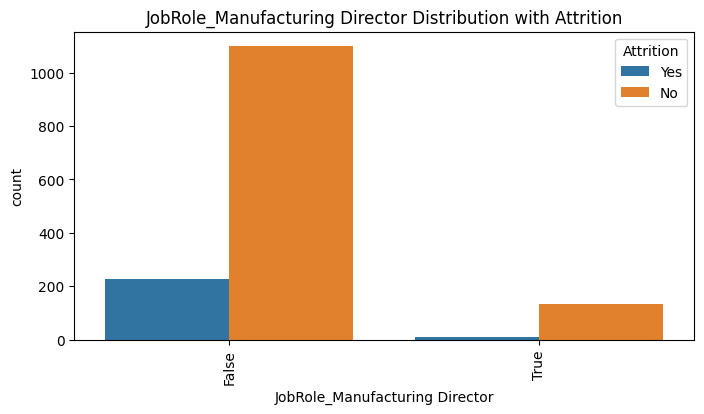

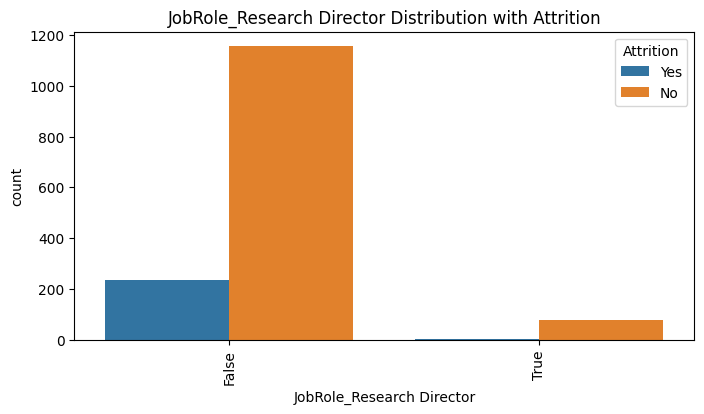

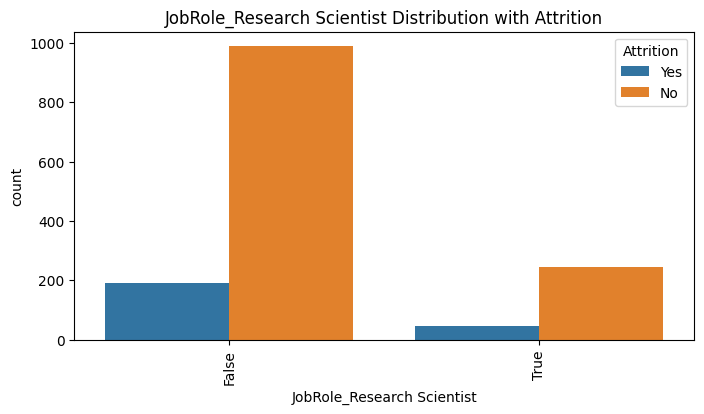

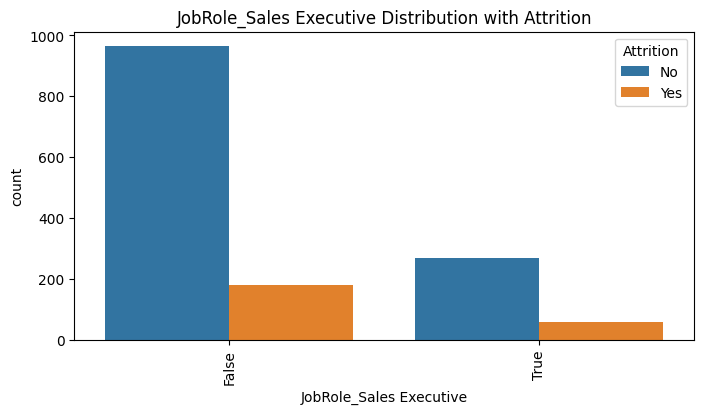

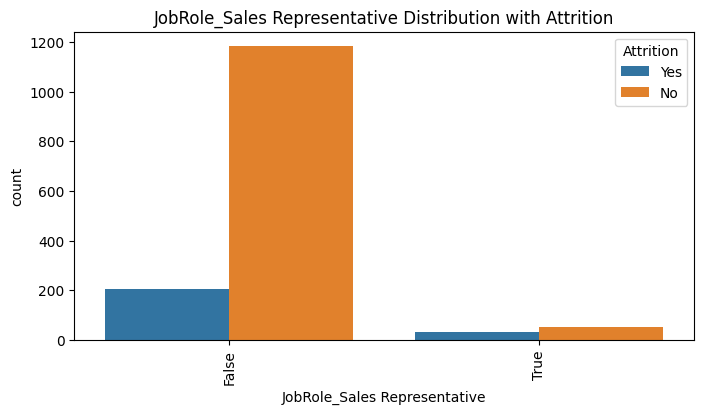

In [24]:
# Getting the list of columns for categorical features after encoding
encoded_categorical_features = [col for col in df.columns if 'Department_' in col or 'JobRole_' in col or col in categorical_features]

# Plot categorical features that exist in the data
for feature in encoded_categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.title(f'{feature} Distribution with Attrition')
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()


## 4. Analyze Numerical Features


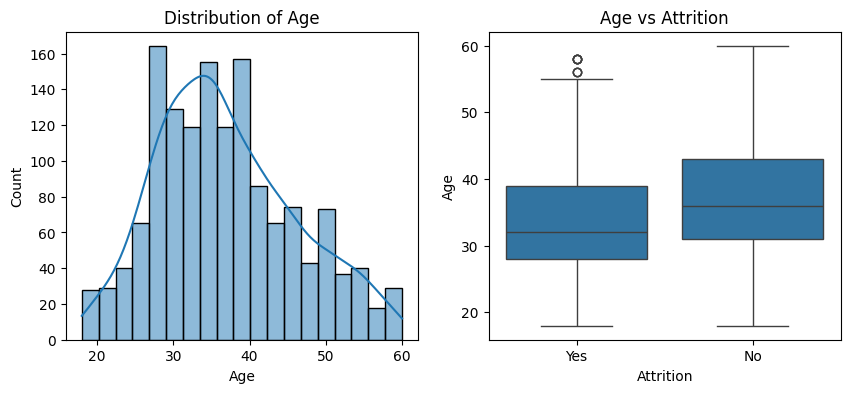

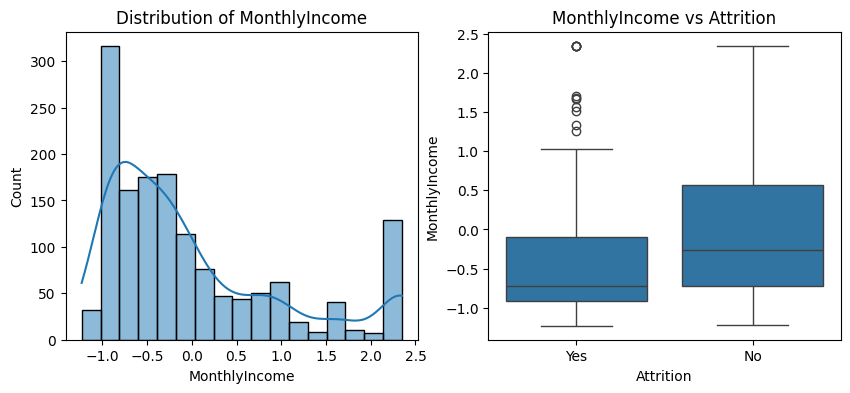

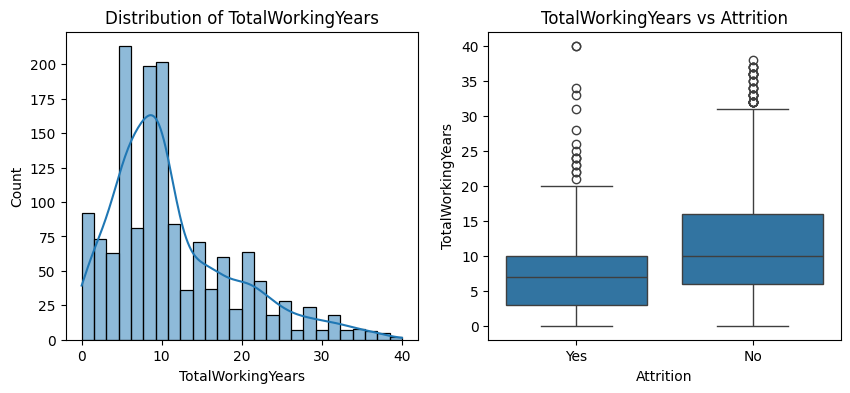

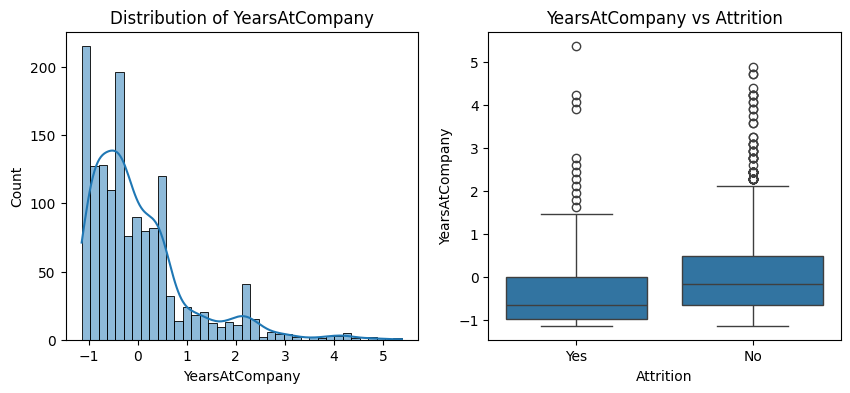

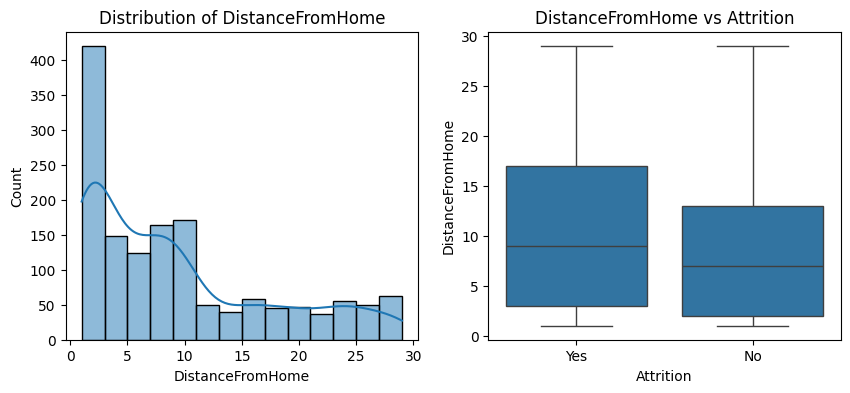

In [25]:
# List of numerical features
numerical_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']

# Plot distribution and boxplots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Boxplot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Attrition', y=feature)
    plt.title(f'{feature} vs Attrition')
    
    plt.show()


## 5. Correlation Analysis


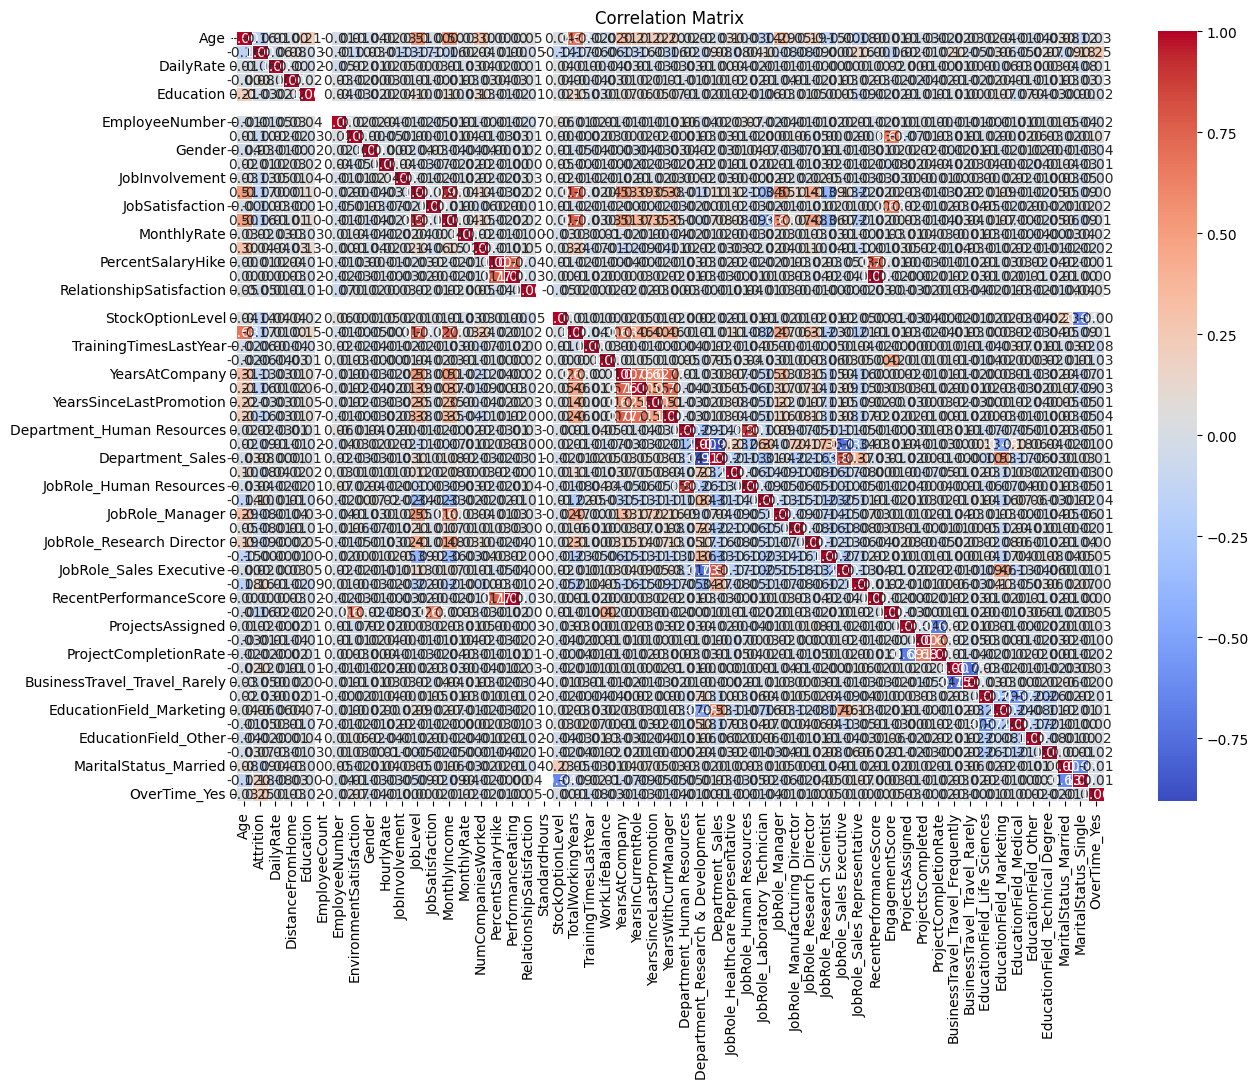

In [27]:
# First, ensure all categorical columns are properly encoded
# Convert 'Attrition' to numeric (Yes = 1, No = 0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# For other object-type columns, one-hot encode them if needed
df_encoded = pd.get_dummies(df, drop_first=True)

# Now, calculate the correlation matrix only on numerical data
plt.figure(figsize=(14, 10))
correlation_matrix = df_encoded.corr()

# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 6. Feature Distributions Based on Attrition


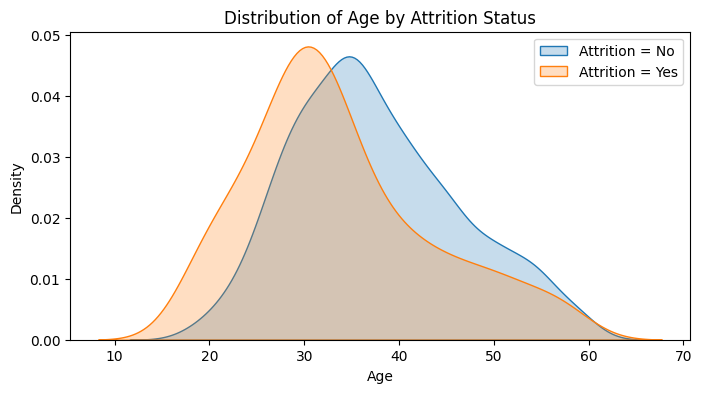

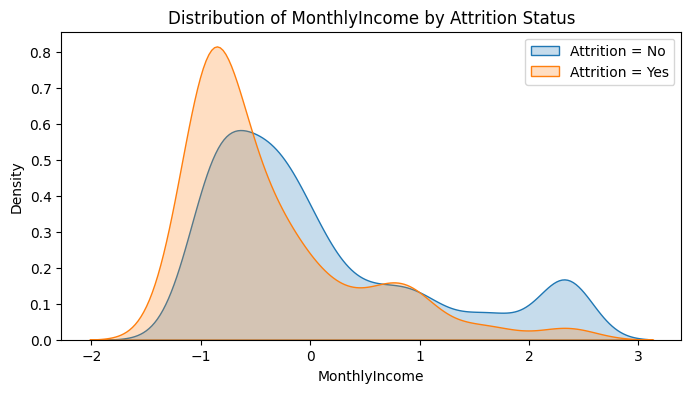

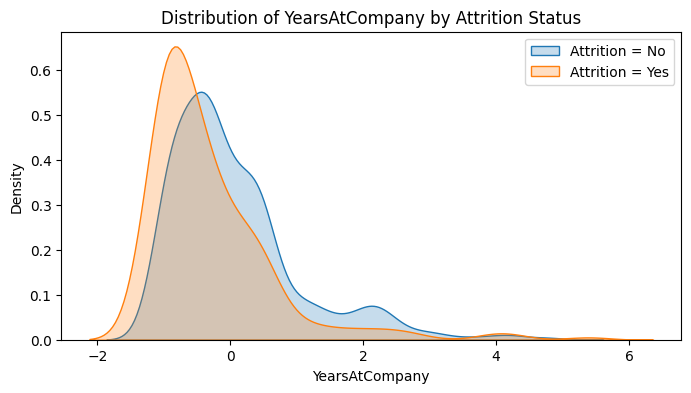

In [29]:
# Feature distribution for attrition vs non-attrition employees
for feature in ['Age', 'MonthlyIncome', 'YearsAtCompany']:  # Add more features as needed
    plt.figure(figsize=(8, 4))
    
    # Replace `shade` with `fill=True`
    sns.kdeplot(data=df[df['Attrition'] == 0][feature], label="Attrition = No", fill=True)
    sns.kdeplot(data=df[df['Attrition'] == 1][feature], label="Attrition = Yes", fill=True)
    
    plt.title(f'Distribution of {feature} by Attrition Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()  # Ensure the labels are correctly passed for the legend
    plt.show()


## 7. Pairplot for Feature Interactions


   Attrition  Attrition_binary
0          1                 0
1          0                 0
2          1                 0
3          0                 0
4          0                 0


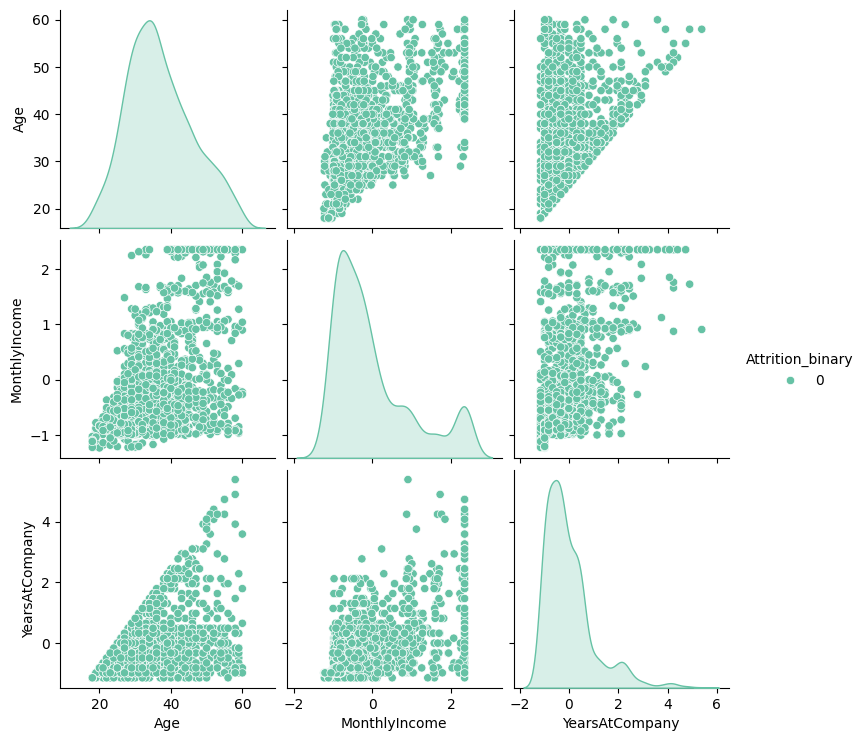

In [31]:
# Convert 'Attrition' to a binary column
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# List of features to include in the pairplot (example features)
pairplot_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition_binary']

# Check if 'Attrition_binary' is correctly created
print(df[['Attrition', 'Attrition_binary']].head())

# Generate a pairplot
sns.pairplot(df[pairplot_features], hue='Attrition_binary', diag_kind='kde', palette='Set2')
plt.show()


# Feature Engineering:



In [15]:
# Create an Engagement Score by combining Job Satisfaction, Work-Life Balance, and Environment Satisfaction
df['EngagementScore'] = (df['JobSatisfaction'] + df['WorkLifeBalance'] + df['EnvironmentSatisfaction']) / 3

# Scale the Engagement Score to a range of 0-100 (optional)
df['EngagementScore'] = df['EngagementScore'] * 25  # assuming the original scale is 1-4
print(df[['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'EngagementScore']].head())


   JobSatisfaction  WorkLifeBalance  EnvironmentSatisfaction  EngagementScore
0                4                1                        2        58.333333
1                2                3                        3        66.666667
2                3                3                        4        83.333333
3                3                3                        4        83.333333
4                2                3                        1        50.000000


In [16]:
import numpy as np

# Generate synthetic data for project completion
np.random.seed(42)  # for reproducibility
df['ProjectsAssigned'] = np.random.randint(5, 15, size=len(df))  # Assign between 5 and 15 projects
df['ProjectsCompleted'] = np.random.randint(3, 10, size=len(df))  # Assume employees completed between 3 and 10 projects

# Calculate project completion rate
df['ProjectCompletionRate'] = df['ProjectsCompleted'] / df['ProjectsAssigned']

# Display the new feature
print(df[['ProjectsAssigned', 'ProjectsCompleted', 'ProjectCompletionRate']].head())


   ProjectsAssigned  ProjectsCompleted  ProjectCompletionRate
0                11                  9               0.818182
1                 8                  5               0.625000
2                12                  8               0.666667
3                 9                  6               0.666667
4                11                  9               0.818182


In [17]:
# Select relevant features for prediction
features = [
    'Age', 'MonthlyIncome', 'RecentPerformanceScore', 'EngagementScore', 
    'ProjectCompletionRate', 'YearsAtCompany', 'Attrition'
]

# Check the resulting dataframe
df_selected = df[features]
print(df_selected.head())


   Age  MonthlyIncome  RecentPerformanceScore  EngagementScore  \
0   41      -0.084766                       3        58.333333   
1   49      -0.283072                       4        66.666667   
2   37      -0.981623                       3        83.333333   
3   33      -0.793428                       3        83.333333   
4   27      -0.664977                       3        50.000000   

   ProjectCompletionRate  YearsAtCompany Attrition  
0               0.818182       -0.164613       Yes  
1               0.625000        0.488508        No  
2               0.666667       -1.144294       Yes  
3               0.666667        0.161947        No  
4               0.818182       -0.817734        No  


In [19]:
# Fill any missing values in the new features (if any)
df['EngagementScore'].fillna(df['EngagementScore'].mean(), inplace=True)
df['ProjectCompletionRate'].fillna(df['ProjectCompletionRate'].mean(), inplace=True)


C:\Users\salma\AppData\Local\Temp\ipykernel_2272\1009932376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EngagementScore'].fillna(df['EngagementScore'].mean(), inplace=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_2272\1009932376.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

#  Model Training
train a machine learning model (such as Logistic Regression, Random Forest, or Gradient Boosting) to predict employee turnover based on features like age, salary, satisfaction levels, etc.

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))



Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       380
           1       0.71      0.28      0.40        61

    accuracy                           0.88       441
   macro avg       0.80      0.63      0.67       441
weighted avg       0.87      0.88      0.86       441

Accuracy: 0.8843537414965986
ROC AUC: 0.7874029335634167


In [45]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       380
           1       0.52      0.41      0.46        61

    accuracy                           0.87       441
   macro avg       0.71      0.67      0.69       441
weighted avg       0.85      0.87      0.86       441

Accuracy: 0.8662131519274376
ROC AUC: 0.8057808455565142


In [47]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))



XGBoost Results:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       380
           1       0.54      0.33      0.41        61

    accuracy                           0.87       441
   macro avg       0.72      0.64      0.67       441
weighted avg       0.85      0.87      0.85       441

Accuracy: 0.8684807256235828
ROC AUC: 0.771397756686799


c:\Users\salma\Documents\GitHub\Attrition-Forecast-Analysis-and-Predictions\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
